In [2]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from aeons.lm_partial import analytic_lm_params, X_end_formula
from aeons.covariance import X_mu, X_Sigmainv, logX_mu, points_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import likelihood, full

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [78]:
ndead = 500
nlive = 50
nk = nk_dead_live(nlive, ndead)
logX_mean = logX_mu(nk)
X_mean = X_mu(nk)

In [79]:
X = generate_Xs(nk)
theta_true = [0, 10, 0.1]
logL = full.func(X, theta_true)
L = np.exp(logL)

In [137]:
logXarray = np.flip(np.linspace(-50, 0, 1000))
Xarray = np.exp(logXarray)
logLarray = full.func(Xarray, theta_true)
Larray = np.exp(logLarray)

In [156]:
def gp_predict(logL, X_mean, Xarray):
    X_mean = X_mean.reshape(-1, 1)
    Xarray = Xarray.reshape(-1, 1)
    kernel = RBF(length_scale=1)
    gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=1, n_restarts_optimizer=9)
    gaussian_process.fit(X_mean, logL)
    mean_prediction, std_prediction = gaussian_process.predict(Xarray, return_std=True)
    print(gaussian_process.kernel_)
    return mean_prediction, std_prediction
Xp = Xarray#[Xarray < X_mean[ndead]]
logXp = np.log(Xp)
# mean, std = gp_predict(logL[ndead:], X_mean[ndead:], Xp)
mean, std = gp_predict(logL, X_mean, Xp)

RBF(length_scale=0.153)


(-50.0, 0.0)

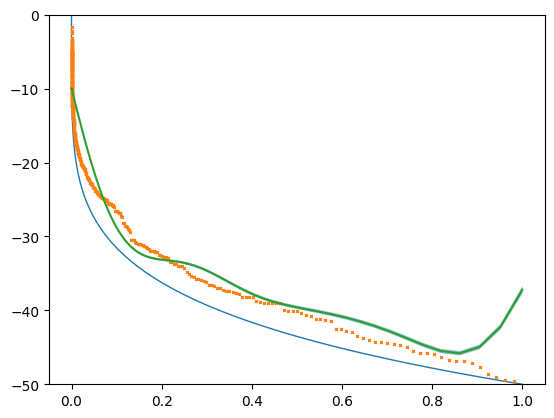

In [157]:
plt.plot(Xarray, logLarray, lw=1)
plt.plot(X_mean, logL, 'x', ms=2)
plt.fill_between(Xp, mean+std, mean-std, alpha=0.5)
plt.plot(Xp, mean)
plt.ylim(-50, 0)

(0.0, 1.0)

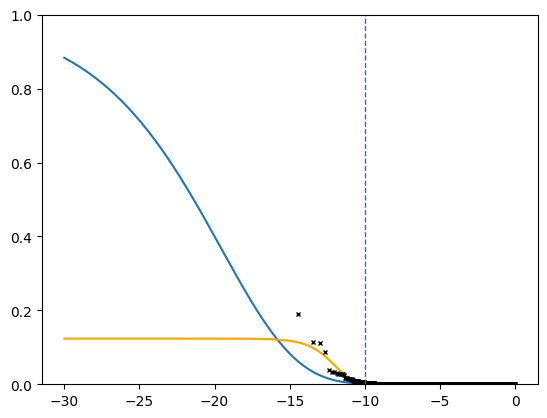

In [114]:
plt.plot(logXarray, Larray)
# plt.plot(np.log(X), L, 'x', ms=2)
plt.plot(logXp, np.exp(mean), color='orange')
plt.fill_between(logXp, np.exp(mean - std), np.exp(mean + std), alpha=0.2, color='orange')
plt.plot(logX_mean, np.exp(logL), 'x', ms=3, color='black')
plt.axvline(logX_mean[ndead], ls='--', lw=1)
plt.ylim(0, 1)